# 🦄 HDBSCAN

1. Librerias y dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from hdbscan import HDBSCAN

2. Dataset

In [6]:
df_cluster_hdbscan = np.load('C:/Users/giuli/OneDrive/.repositorios/machine-learning-level-up/clase09/Datasets/clusterable_data.npy')

3. Algoritmo
    * **min_cluster_size=20**: Define que el tamaño mínimo de un clúster debe ser 20 puntos. Los clústeres más pequeños que este número se considerarán ruido o no válidos.
    * **min_samples=10**: Define que se necesitan al menos 10 puntos en la vecindad de un punto para considerarlo como parte de un clúster. Esto ayuda a evitar la clasificación de puntos en clústeres muy esparcidos.

In [7]:
#Instanciamos el algoritmo
hdbscan = HDBSCAN(min_cluster_size=20, min_samples=10)

 * **fit_predict** ajusta el modelo HDBSCAN a los datos y predice las etiquetas de los clústeres para cada punto. Las etiquetas devueltas en preds indicarán a qué clúster pertenece cada punto, o si el punto es ruido (generalmente etiquetado como -1).

In [ ]:
#Entrenamos y predecimos
preds = hdbscan.fit_predict(df_cluster_hdbscan)

4. Gráfico

In [8]:
#Convertimos en dataframe para poder graficar!
df_cluster_hdbscan = pd.DataFrame(df_cluster_hdbscan)
df_cluster_hdbscan.head()

,0,1
0,-0.121535,-0.228763
1,-0.220937,-0.252511
2,0.125904,-0.273143
3,-0.164537,-0.222244
4,-0.180824,-0.211075


In [11]:
#Renombramos las columnas
df_cluster_hdbscan = df_cluster_hdbscan.rename(columns={0:'x', 1:'y'})
df_cluster_hdbscan.columns

Index(['x', 'y'], dtype='object')

Visualización:

 * **c=df_cluster_hdbscan['cluster']**: Usa las etiquetas de clúster para colorear los puntos en el gráfico. Los puntos que no pertenecen a ningún clúster se mostrarán en un color específico (generalmente -1 para ruido).
 * **plt.colorbar(label='Número de clúster')**: Añade una barra de colores para identificar los clústeres.

Ajustes:
 * **min_cluster_size** y **min_samples**: Puedes ajustar estos parámetros según la naturaleza de tus datos y el tamaño esperado de los clústeres.

<Axes: xlabel='x', ylabel='y'>

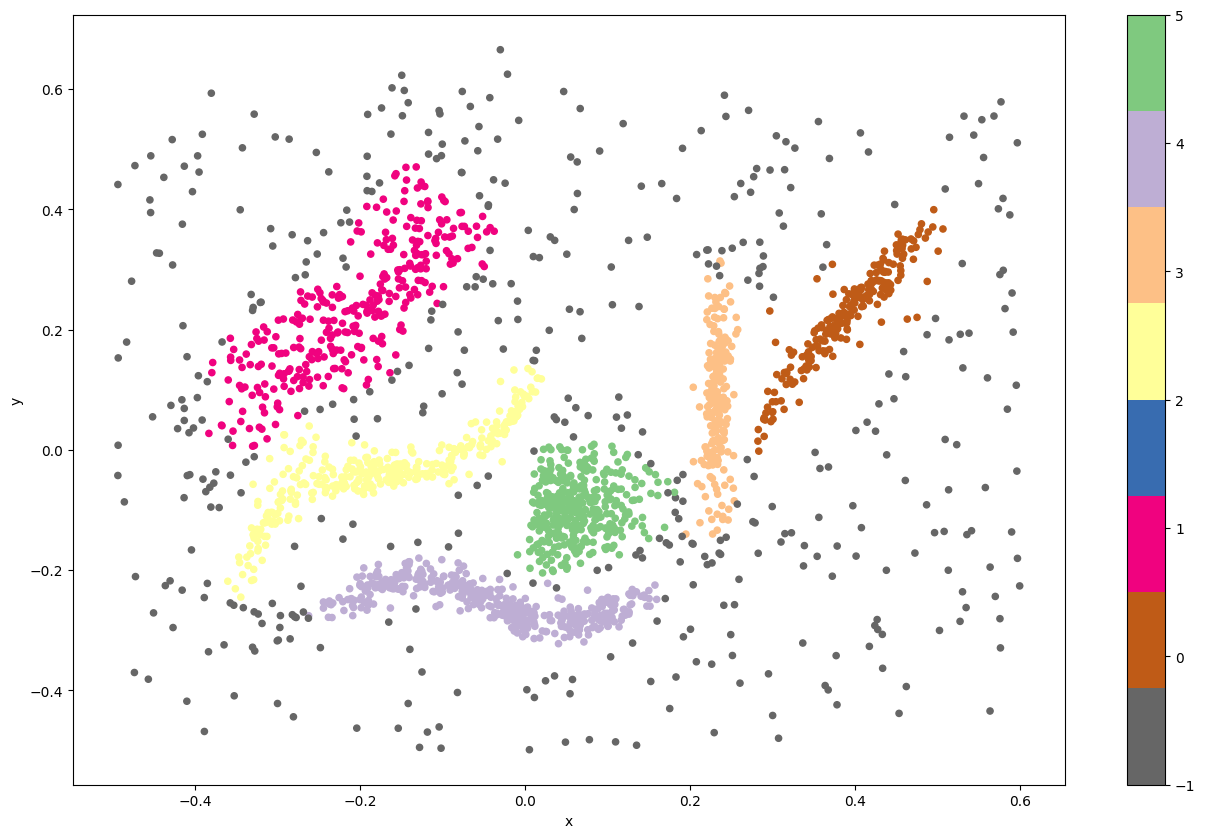

In [13]:
#Graficamos
df_cluster_hdbscan.plot(kind='scatter', x='x', y='y', c=preds, cmap='Accent_r', figsize=(16,10))